<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/05.Cluster%20Analysis%20in%20Python/11_Normalize_Data_for_FIFA_Dataset_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import random
random.seed((1000,2000))

In [ ]:
!wget https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv

--2020-05-25 02:02:48--  https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 13.226.45.40, 13.226.45.81, 13.226.45.82, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.226.45.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1084747 (1.0M) [text/csv]
Saving to: ‘fifa_18_sample_data.csv’

fifa_18_sample_data 100%[===================>]   1.03M  --.-KB/s    in 0.1s    

2020-05-25 02:02:49 (7.82 MB/s) - ‘fifa_18_sample_data.csv’ saved [1084747/1084747]



In [ ]:
import pandas as pd

In [ ]:
fifa = pd.read_csv('fifa_18_sample_data.csv')

In [ ]:
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,...,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,...,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,...,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,55,11,30,14,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
from scipy.cluster.vq import  whiten

In [ ]:
fifa = fifa[['def', 'phy']].astype(float)

In [ ]:
# Set up a random seed in numpy
random.seed()

                      def        phy
cluster_labels                      
0               77.308017  77.128692
1               32.801444  65.606498
2               50.742972  74.357430


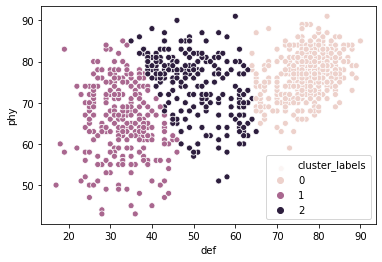

In [ ]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['def', 'phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['def', 'phy']], cluster_centers)

# Display cluster centers 
print(fifa[['def', 'phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='def', y='phy', hue='cluster_labels', data=fifa)
plt.show()